因果探索いくつか

In [ ]:
#!pip install lingam
!pip install git+https://github.com/cdt15/lingam.git
import lingam
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
from lingam.utils import make_dot
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

データセット
- ボストン住宅価格と適当にkaggleのもの

In [20]:
boston = pd.read_csv("/content/drive/MyDrive/projects/boston/data/boston.csv")
kaggle = pd.read_csv("/content/drive/MyDrive/projects/playground-series-s3e12/data/train.csv")

print(boston.shape)
print(kaggle.shape)
display(boston.head())
display(kaggle.head())

(506, 24)
(414, 8)


,ID,TOWN,TOWNNO,TRACT,LON,LAT,x,y,MEDV,CMEDV,...,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,geometry
0,1.000,0.000,0.000,2011.000,-70.955,42.255,338.730,4679.730,24.000,24.000,...,0.538,6.575,65.200,4.090,1.000,296.000,15.300,396.900,4.980,POINT (338.73 4679.73)
1,2.000,0.000,1.000,2021.000,-70.950,42.288,339.230,4683.330,21.600,21.600,...,0.469,6.421,78.900,4.967,2.000,242.000,17.800,396.900,9.140,POINT (339.23 4683.33)
2,3.000,0.000,1.000,2022.000,-70.936,42.283,340.370,4682.800,34.700,34.700,...,0.469,7.185,61.100,4.967,2.000,242.000,17.800,392.830,4.030,POINT (340.37 4682.8)
3,4.000,0.000,2.000,2031.000,-70.928,42.293,341.050,4683.890,33.400,33.400,...,0.458,6.998,45.800,6.062,3.000,222.000,18.700,394.630,2.940,POINT (341.05 4683.89)
4,5.000,0.000,2.000,2032.000,-70.922,42.298,341.560,4684.440,36.200,36.200,...,0.458,7.147,54.200,6.062,3.000,222.000,18.700,396.900,5.330,POINT (341.56 4684.44)


,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.190,443,14.800,124,1.450,0
1,1,1.025,5.400,703,23.600,394,4.180,0
2,2,1.009,6.130,371,24.500,159,9.040,0
3,3,1.021,4.910,442,20.800,398,6.630,1
4,4,1.021,5.530,874,17.800,385,2.210,1


関数とか

In [12]:
# 帰無仮説は独立である
def check_noise(model, X):
    p_values = model.get_error_independence_p_values(X)
    return p_values

def causal_discovery(df, use_columns):
    df = df[use_columns]
    ss = StandardScaler()
    norm_df = ss.fit_transform(df)

    # LiNGAM
    print("LiNGAM")
    model_lingam = lingam.DirectLiNGAM()
    model_lingam.fit(norm_df)
    display(make_dot(model_lingam.adjacency_matrix_, labels=use_columns))
    display(pd.DataFrame(check_noise(model_lingam, norm_df), columns=use_columns))

    # BottomUp
    print("BottomUpParceLiNGAM")
    model_bup = lingam.BottomUpParceLiNGAM()
    model_bup.fit(norm_df)
    display(make_dot(model_bup.adjacency_matrix_, labels=use_columns))
    display(pd.DataFrame(check_noise(model_bup, norm_df), columns=use_columns))

    # CAM-UV
    print("CAM-UV")
    model_cam = lingam.CAMUV()
    model_cam.fit(norm_df)
    display(make_dot(model_cam._adjacency_matrix, labels=use_columns))
    display(pd.DataFrame(check_noise(model_bup, norm_df), columns=use_columns))

LiNGAM


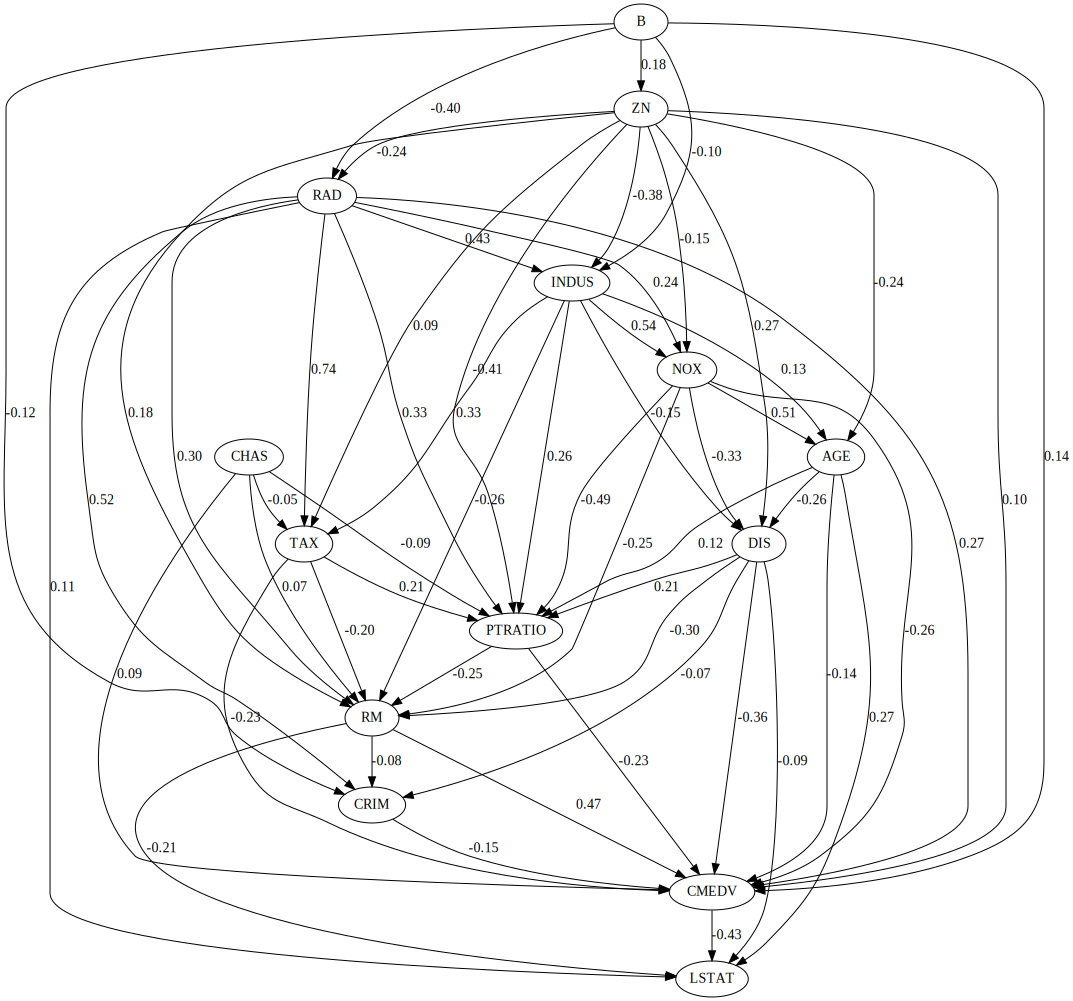

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000,0.000,0.000,0.000,NaN,0.036,0.000,0.000,0.000,0.000,0.142,0.000,0.004,0.004
1,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2,0.000,0.000,0.000,0.000,NaN,0.000,0.394,0.008,0.000,0.000,0.000,0.000,0.000,0.000
3,0.000,0.000,0.000,0.000,NaN,0.000,0.006,0.000,0.000,0.000,0.000,0.000,0.000,0.035
4,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.036,0.000,0.000,0.000,NaN,0.000,0.002,0.000,0.000,0.000,0.000,0.000,0.000,0.001
6,0.000,0.000,0.394,0.006,NaN,0.002,0.000,0.000,0.101,0.000,0.040,0.001,0.012,0.000
7,0.000,0.000,0.008,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.017,0.000,0.627,0.008
8,0.000,0.000,0.000,0.000,NaN,0.000,0.101,0.000,0.000,0.000,0.000,0.001,0.000,0.146
9,0.000,0.000,0.000,0.000,NaN,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.013


BottomUpParceLiNGAM


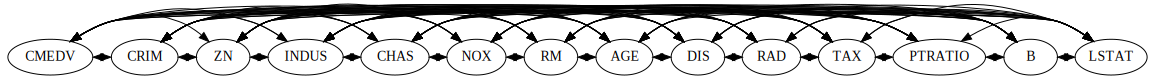

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN


CAM-UV


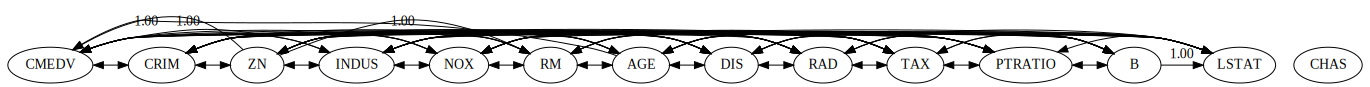

,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN


In [15]:
use_columns1 = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
causal_discovery(boston, use_columns1)

In [11]:
boston[use_columns1].dtypes

CMEDV      float64
CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object

LiNGAM


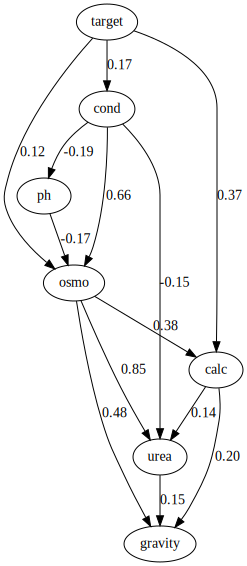

,gravity,ph,osmo,cond,urea,calc,target
0,0.000,0.270,0.000,0.000,0.003,0.000,0.098
1,0.270,0.000,0.542,0.000,0.006,0.135,0.497
2,0.000,0.542,0.000,0.000,0.000,0.010,0.361
3,0.000,0.000,0.000,0.000,0.218,0.000,0.000
4,0.003,0.006,0.000,0.218,0.000,0.005,0.258
5,0.000,0.135,0.010,0.000,0.005,0.000,0.000
6,0.098,0.497,0.361,0.000,0.258,0.000,0.000


BottomUpParceLiNGAM


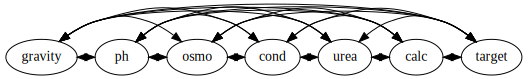

,gravity,ph,osmo,cond,urea,calc,target
0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.000,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.000,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.000,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.000,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.000,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.000


CAM-UV


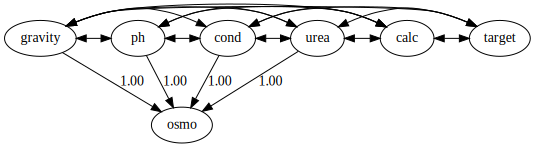

,gravity,ph,osmo,cond,urea,calc,target
0,0.000,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,0.000,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0.000,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.000,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.000,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,0.000,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,0.000


In [17]:
use_columns2 = ['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target']
causal_discovery(kaggle, use_columns2)

In [27]:
from lingam.utils import print_causal_directions, print_dagc, make_dot
def lingam_bootstrap(df, use_columns):
    df = df[use_columns]
    ss = StandardScaler()
    norm_df = ss.fit_transform(df)

    # Bootstrap
    model = lingam.DirectLiNGAM()
    result = model.bootstrap(norm_df, n_sampling=100)
    # 多い組み合わせ
    cdc = result.get_causal_direction_counts(n_directions=8, min_causal_effect=0.01, split_by_causal_effect_sign=True)
    print_causal_directions(cdc, 100)

    # 多かったグラフ
    dagc = result.get_directed_acyclic_graph_counts(n_dags=3, min_causal_effect=0.01, split_by_causal_effect_sign=True)
    print_dagc(dagc, 100)

In [28]:
lingam_bootstrap(boston, use_columns1)

x7 <--- x2 (b<0) (100.0%)
x8 <--- x2 (b>0) (100.0%)
x11 <--- x2 (b<0) (100.0%)
x8 <--- x7 (b<0) (98.0%)
x1 <--- x9 (b>0) (98.0%)
x10 <--- x9 (b>0) (97.0%)
x3 <--- x2 (b<0) (94.0%)
x11 <--- x5 (b<0) (93.0%)
DAG[0]: 1.0%
	x0 <--- x1 (b<0)
	x0 <--- x4 (b>0)
	x0 <--- x5 (b<0)
	x0 <--- x7 (b<0)
	x0 <--- x12 (b>0)
	x1 <--- x9 (b>0)
	x1 <--- x12 (b<0)
	x2 <--- x12 (b>0)
	x3 <--- x2 (b<0)
	x3 <--- x5 (b>0)
	x3 <--- x6 (b<0)
	x3 <--- x9 (b>0)
	x5 <--- x2 (b<0)
	x5 <--- x4 (b>0)
	x5 <--- x9 (b>0)
	x5 <--- x12 (b<0)
	x6 <--- x0 (b>0)
	x6 <--- x12 (b<0)
	x6 <--- x13 (b<0)
	x7 <--- x1 (b>0)
	x7 <--- x2 (b<0)
	x7 <--- x5 (b>0)
	x8 <--- x0 (b<0)
	x8 <--- x1 (b<0)
	x8 <--- x2 (b>0)
	x8 <--- x3 (b<0)
	x8 <--- x5 (b<0)
	x8 <--- x7 (b<0)
	x9 <--- x2 (b<0)
	x9 <--- x12 (b<0)
	x10 <--- x0 (b<0)
	x10 <--- x2 (b>0)
	x10 <--- x3 (b>0)
	x10 <--- x4 (b<0)
	x10 <--- x9 (b>0)
	x11 <--- x0 (b<0)
	x11 <--- x2 (b<0)
	x11 <--- x3 (b>0)
	x11 <--- x5 (b<0)
	x11 <--- x9 (b>0)
	x13 <--- x0 (b<0)
	x13 <--- x1 (b>0)
	x13 <

In [29]:
lingam_bootstrap(kaggle, use_columns2)

x5 <--- x6 (b>0) (100.0%)
x2 <--- x3 (b>0) (99.0%)
x0 <--- x2 (b>0) (95.0%)
x4 <--- x2 (b>0) (95.0%)
x0 <--- x5 (b>0) (94.0%)
x4 <--- x5 (b>0) (90.0%)
x4 <--- x3 (b<0) (82.0%)
x2 <--- x1 (b<0) (71.0%)
DAG[0]: 3.0%
	x0 <--- x2 (b>0)
	x0 <--- x4 (b>0)
	x0 <--- x5 (b>0)
	x1 <--- x6 (b<0)
	x2 <--- x1 (b<0)
	x2 <--- x3 (b>0)
	x2 <--- x5 (b>0)
	x3 <--- x1 (b<0)
	x3 <--- x5 (b>0)
	x4 <--- x2 (b>0)
	x4 <--- x3 (b<0)
	x4 <--- x5 (b>0)
	x5 <--- x1 (b<0)
	x5 <--- x6 (b>0)
DAG[1]: 2.0%
	x0 <--- x1 (b<0)
	x0 <--- x2 (b>0)
	x0 <--- x5 (b>0)
	x1 <--- x3 (b<0)
	x2 <--- x1 (b<0)
	x2 <--- x3 (b>0)
	x2 <--- x5 (b>0)
	x3 <--- x6 (b>0)
	x4 <--- x2 (b>0)
	x4 <--- x3 (b<0)
	x4 <--- x5 (b>0)
	x5 <--- x1 (b<0)
	x5 <--- x3 (b>0)
	x5 <--- x6 (b>0)
DAG[2]: 2.0%
	x0 <--- x2 (b>0)
	x0 <--- x4 (b>0)
	x0 <--- x5 (b>0)
	x1 <--- x2 (b<0)
	x2 <--- x3 (b>0)
	x2 <--- x5 (b>0)
	x3 <--- x6 (b>0)
	x4 <--- x2 (b>0)
	x4 <--- x3 (b<0)
	x4 <--- x5 (b>0)
	x5 <--- x3 (b>0)
	x5 <--- x6 (b>0)
